In [1]:

import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import re, nltk

In [5]:
from nltk.stem import WordNetLemmatizer

In [1]:
from nltk.corpus import stopwords

In [7]:
dset = pd.read_csv("2ClassTrainingDataset.csv", header=None)

In [8]:
dset.head()

0                    1                                                  2
0  1  s887067566329536512  Disabled Vehicle on Westbound highway WB at Em...
1  0  s898251156299927553  New Teacher Lunch &amp; training! Marker wars ...
2  0  s880911328117915648  And the  spot in our #uhaultrends Canadian Des...
3  0  s902182178158776321   years ago today #MLK gave his historic "I Hav...
4  0  s902816102794878976   Aww it’s always hard to say goodbye! 😢 What’s...

In [9]:
 dset.columns=["Class", "Tweet ID", "Tweet Text"]

In [10]:
dset.head()

Class             Tweet ID  \
0      1  s887067566329536512   
1      0  s898251156299927553   
2      0  s880911328117915648   
3      0  s902182178158776321   
4      0  s902816102794878976   

                                          Tweet Text  
0  Disabled Vehicle on Westbound highway WB at Em...  
1  New Teacher Lunch &amp; training! Marker wars ...  
2  And the  spot in our #uhaultrends Canadian Des...  
3   years ago today #MLK gave his historic "I Hav...  
4   Aww it’s always hard to say goodbye! 😢 What’s...

In [11]:
shapeResult = dset.shape

In [12]:
"No of Rows Available in Dataset : " + str(shapeResult[0])

'No of Rows Available in Dataset : 40879'

In [13]:
"No of Columns Available in Dataset : " + str(shapeResult[1])

'No of Columns Available in Dataset : 3'

In [14]:
print("No of Nulls on Each Column", dset.isna().sum())

No of Nulls on Each Column Class         0
Tweet ID      0
Tweet Text    0
dtype: int64


In [15]:
traffic_category_count = dset["Class"].value_counts()

In [16]:
Index = [1,2]
plt.bar(Index,traffic_category_count)
plt.xticks(Index,['Non Traffic','Traffic Incident'],rotation=45)
plt.ylabel('Row Count')
plt.xlabel('Traffic Category')
plt.title('Count of Rows')

Text(0.5, 1.0, 'Count of Rows')

In [17]:
print("Total Number of Tweets by Each User ", dset.groupby("Tweet ID")['Class'].count().sort_values(ascending=False))

Total Number of Tweets by Each User  Tweet ID
s896864003850371072    2
s899373014214733824    2
s897509966176808960    2
s900019474853535745    2
s897064044577738752    2
s900736802960662528    2
s900227109716713473    2
s900046311390621697    2
s898089489750478849    2
s898533299395723264    2
s902150463742607360    2
s897838283908161537    2
s902329742828781568    2
s898604436494274560    2
s899044512865157120    2
s899411386320793602    2
s900873899184926721    2
s898241503298019328    2
s901054907733684224    2
s902558637255782405    2
s899334317377282048    2
s897615857911836672    2
s899232595820589057    2
s897653387218518016    2
s898544750059372544    2
s900355430731350016    2
s898250075666821120    2
s897883904673067008    2
s899327725843996672    2
s898588648903286787    2
                      ..
s901123854914932736    1
s901123624391913472    1
s901126087714930689    1
s901123622642876416    1
s901123536705777664    1
s901123534252060673    1
s901123332162146304    1
s901

In [18]:
from wordcloud import WordCloud, STOPWORDS

In [19]:
non_traffic_dataset = dset[dset["Class"] == 0]

In [20]:
non_traffic_rw = non_traffic_dataset.shape

In [21]:
print("No of Rows Available for Non Traffic", non_traffic_rw[0])

No of Rows Available for Non Traffic 20440


In [22]:
non_traffic_all_words = ' '.join(non_traffic_dataset["Tweet Text"])

In [23]:
non_traffic_all_words

'New Teacher Lunch &amp; training! Marker wars w/ Greta\'s buzzwords! #PowellNation #ourcougarsourculture  And the  spot in our #uhaultrends Canadian Destination Cites countdown is...#Toronto Ontario!…   years ago today #MLK gave his historic "I Have A Dream" speech. #MarchOnWashington   Aww it’s always hard to say goodbye! 😢 What’s been your favorite memory with Elizabeth?  DO NOT PAY North Korea another single PENNY! 😡 America is through with sissy talking and selling o…  Congrats to  sitcimguy for being #Uhaulactive! Enjoy your swag bags! Sign up for Active Day &gt;…  "This Mother’s Day, say thank you. Say, \'I love you.\'" —President Obama   We\'re sorry to hear this, Andreas. Please contact your local Workshop at: to have this looked at. Chuck Berry rolled over everyone who came before him – and turned up everyone who came after. We\'ll miss you, Chuck. Be good. One of the many beautiful views from #OneWTC Repost from #nyc #skyline #nycreal…  Preventing mold is key to proper #RV s

In [24]:
non_traffic_cleaned_words = ' '.join([word for word in non_traffic_all_words.split()
                                                     if 'http' not in word 
                                                     and not word.startswith("@")
                                                     and word != 'RT'
                                     ])

In [25]:
non_traffic_cleaned_words

'New Teacher Lunch &amp; training! Marker wars w/ Greta\'s buzzwords! #PowellNation #ourcougarsourculture And the spot in our #uhaultrends Canadian Destination Cites countdown is...#Toronto Ontario!… years ago today #MLK gave his historic "I Have A Dream" speech. #MarchOnWashington Aww it’s always hard to say goodbye! 😢 What’s been your favorite memory with Elizabeth? DO NOT PAY North Korea another single PENNY! 😡 America is through with sissy talking and selling o… Congrats to sitcimguy for being #Uhaulactive! Enjoy your swag bags! Sign up for Active Day &gt;… "This Mother’s Day, say thank you. Say, \'I love you.\'" —President Obama We\'re sorry to hear this, Andreas. Please contact your local Workshop at: to have this looked at. Chuck Berry rolled over everyone who came before him – and turned up everyone who came after. We\'ll miss you, Chuck. Be good. One of the many beautiful views from #OneWTC Repost from #nyc #skyline #nycreal… Preventing mold is key to proper #RV storage! #Self

In [26]:
non_traffic_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(non_traffic_cleaned_words)

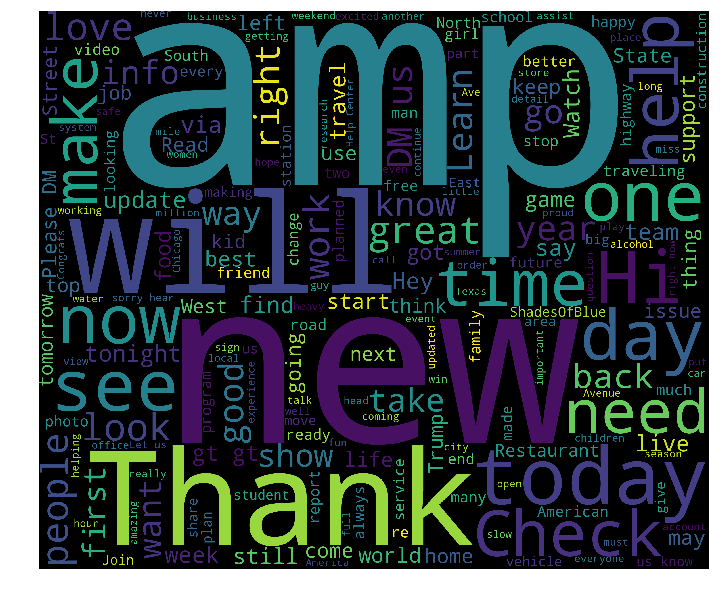

In [27]:
plt.figure(1,figsize=(12, 12))
plt.imshow(non_traffic_wordcloud)
plt.axis('off')
plt.show()

In [28]:
traffic_incident_dataset = dset[dset["Class"] == 1]

In [29]:
traffic_incident_rw = traffic_incident_dataset.shape

In [30]:
print("No of Rows Available for Traffic Incidents", traffic_incident_rw[0])

No of Rows Available for Traffic Incidents 20439


In [31]:
traffic_incident_all_words = ' '.join(traffic_incident_dataset["Tweet Text"])

In [32]:
traffic_incident_all_words

'Disabled Vehicle on Westbound highway WB at Emily Drive.\n\nUse caution when traveling through this area. Construction on #US40 Both directions from NJ /CR to East of NJ /CR  Cleared: Incident on #ELine Queens bound at Jamaica Center-Parsons/Archer Station highway eastbound, all lanes open @ MM , NSP running pace car operations starting near MM . Incident on # Line Queens bound from Queensboro Plaza Station to 74th Street-Broadway Station  Cleared: Incident on #EssexLine at Summit and Maplewood train stations Woodlawn Rd, Welland between First and Graham St blocked by fallen telephone pole New: Planned construction in Broward on highway north beyond Hallandale Beach Blvd, left lane blocked. Last... RT radioairenews: TRAVEL: Slow traffic on A6120 Ring Road (Seacroft) Westbound around A64 York Road / York Road, congestion on A64 to Kidda… Cleared: Construction on #GardenStateParkway NB from South of Raritan Toll Plaza to South of Exit - highway/highway/NJ  #Scottsdale ==== COLLISION UPD

In [33]:
traffic_incident_cleaned_words = ' '.join([word for word in traffic_incident_all_words.split()
                                                     if 'http' not in word 
                                                     and not word.startswith("@")
                                                     and word != 'RT'
                                     ])

In [34]:
traffic_incident_cleaned_words

'Disabled Vehicle on Westbound highway WB at Emily Drive. Use caution when traveling through this area. Construction on #US40 Both directions from NJ /CR to East of NJ /CR Cleared: Incident on #ELine Queens bound at Jamaica Center-Parsons/Archer Station highway eastbound, all lanes open MM , NSP running pace car operations starting near MM . Incident on # Line Queens bound from Queensboro Plaza Station to 74th Street-Broadway Station Cleared: Incident on #EssexLine at Summit and Maplewood train stations Woodlawn Rd, Welland between First and Graham St blocked by fallen telephone pole New: Planned construction in Broward on highway north beyond Hallandale Beach Blvd, left lane blocked. Last... radioairenews: TRAVEL: Slow traffic on A6120 Ring Road (Seacroft) Westbound around A64 York Road / York Road, congestion on A64 to Kidda… Cleared: Construction on #GardenStateParkway NB from South of Raritan Toll Plaza to South of Exit - highway/highway/NJ #Scottsdale ==== COLLISION UPDATE, SB bef

In [35]:
traffic_incident_wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(traffic_incident_cleaned_words)

In [36]:
plt.figure(1,figsize=(12, 12))
plt.imshow(traffic_incident_wordcloud)
plt.axis('off')
plt.show()

## Word Frequency in Non Traffic Cleaned Data

In [37]:
def wordFrequency(str): 
    str = str.split()          
    str2 = [] 
    for i in str:              
        if i not in str2:  
            str2.append(i)  
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))

In [38]:
%%time
wordFrequency(non_traffic_cleaned_words)

Frequency of New is : 397
Frequency of &amp; is : 2098
Frequency of w/ is : 243
Frequency of And is : 125
Frequency of the is : 9124
Frequency of in is : 4566
Frequency of our is : 1727
Frequency of years is : 94
Frequency of today is : 245
Frequency of his is : 308
Frequency of Have is : 146
Frequency of A is : 491
Frequency of always is : 124
Frequency of hard is : 68
Frequency of to is : 8834
Frequency of say is : 109
Frequency of been is : 342
Frequency of your is : 2565
Frequency of favorite is : 74
Frequency of with is : 2109
Frequency of North is : 192
Frequency of another is : 107
Frequency of is is : 2948
Frequency of through is : 168
Frequency of and is : 4208
Frequency of Congrats is : 104
Frequency of for is : 4589
Frequency of being is : 183
Frequency of up is : 720
Frequency of Day is : 88
Frequency of thank is : 81
Frequency of you. is : 260
Frequency of love is : 332
Frequency of Obama is : 63
Frequency of We're is : 404
Frequency of sorry is : 255
Frequency of hear is 

Frequency of For is : 163
Frequency of time is : 299
Frequency of most is : 154
Frequency of song is : 62
Frequency of bad is : 59
Frequency of ( is : 92
Frequency of News is : 67
Frequency of Street is : 84
Frequency of around is : 115
Frequency of visit is : 169
Frequency of Oh is : 55
Frequency of down is : 182
Frequency of How is : 268
Frequency of hope is : 144
Frequency of keep is : 157
Frequency of It’s is : 52
Frequency of going is : 178
Frequency of it. is : 129
Frequency of Sorry is : 68
Frequency of this. is : 88
Frequency of Did is : 99
Frequency of try is : 103
Frequency of call is : 109
Frequency of thing is : 65
Frequency of when is : 365
Frequency of $ is : 119
Frequency of Hurricane is : 106
Frequency of send is : 143
Frequency of save is : 81
Frequency of than is : 285
Frequency of ever is : 96
Frequency of thanks is : 86
Frequency of off is : 254
Frequency of state is : 59
Frequency of list is : 52
Frequency of meet is : 52
Frequency of heavy is : 91
Frequency of tra

Frequency of Center: is : 51
Frequency of having is : 95
Frequency of Senate is : 56
Frequency of said is : 58
Frequency of system is : 81
Frequency of Not is : 76
Frequency of story is : 56
Frequency of Team is : 52
Frequency of reaching is : 69
Frequency of young is : 62
Frequency of end is : 82
Frequency of ... is : 69
Frequency of morning is : 56
Frequency of meeting is : 56
Frequency of football is : 86
Frequency of stand is : 52
Frequency of join is : 63
Frequency of highway is : 85
Frequency of Ave is : 58
Frequency of crash is : 56
Frequency of U-Haul is : 53
Frequency of | is : 97
Frequency of glad is : 85
Frequency of since is : 77
Frequency of Road is : 60
Frequency of friends is : 52
Frequency of (Foodservice.com is : 54
Wall time: 5min 48s


## Word Frequency in Traffic Incident Data

In [39]:
wordFrequency(traffic_incident_cleaned_words)

Frequency of Disabled is : 1030
Frequency of Vehicle is : 695
Frequency of on is : 13205
Frequency of Westbound is : 153
Frequency of highway is : 10258
Frequency of WB is : 1379
Frequency of at is : 10873
Frequency of Use is : 371
Frequency of caution is : 434
Frequency of when is : 225
Frequency of traveling is : 249
Frequency of through is : 240
Frequency of this is : 390
Frequency of area. is : 237
Frequency of Construction is : 1145
Frequency of Both is : 1038
Frequency of directions is : 1127
Frequency of from is : 3126
Frequency of NJ is : 387
Frequency of to is : 6690
Frequency of East is : 526
Frequency of of is : 3404
Frequency of Cleared: is : 2586
Frequency of Incident is : 2409
Frequency of #ELine is : 158
Frequency of Queens is : 262
Frequency of bound is : 404
Frequency of Station is : 2638
Frequency of all is : 812
Frequency of lanes is : 2856
Frequency of open is : 277
Frequency of MM is : 1241
Frequency of , is : 1033
Frequency of car is : 67
Frequency of near is : 75

Frequency of :: is : 135
Frequency of | is : 1531
Frequency of EB/WB is : 65
Frequency of RD is : 201
Frequency of (Both is : 65
Frequency of Directions) is : 65
Frequency of that is : 109
Frequency of over is : 57
Frequency of still is : 156
Frequency of for is : 787
Frequency of Multi-vehicle is : 109
Frequency of Orange is : 394
Frequency of S is : 442
Frequency of Int is : 60
Frequency of w/ is : 86
Frequency of Delay is : 408
Frequency of &lt; is : 259
Frequency of 20min, is : 259
Frequency of ln is : 285
Frequency of Closed is : 332
Frequency of BOTH is : 239
Frequency of DIR is : 166
Frequency of winter is : 57
Frequency of WY is : 62
Frequency of Other is : 114
Frequency of NB/SB is : 97
Frequency of Left is : 452
Frequency of use is : 421
Frequency of County: is : 122
Frequency of non-injury is : 68
Frequency of bridge is : 90
Frequency of alternate is : 150
Frequency of route. is : 124
Frequency of cleared. is : 176
Frequency of WB: is : 63
Frequency of reduced is : 62
Freque

Frequency of #6Line is : 51
Frequency of Jr. is : 52
Frequency of p.m. is : 57
Frequency of Bus is : 58
Frequency of Rt. is : 104
Frequency of MT- is : 55
Frequency of Sarasota is : 53
Frequency of time is : 59
Frequency of hazard is : 53
Frequency of (One is : 70
Frequency of Direction) is : 70
Frequency of Street-Columbus is : 62
Frequency of Stafford is : 67


In [40]:
wordnet_lemmatizer = WordNetLemmatizer()

In [41]:
def normalizer(tweet):
    tokens = nltk.word_tokenize(tweet)[0:]
    lower_case = [l.lower() for l in tokens]
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in lower_case]
    return lemmas

In [42]:
normalizer("Chennai is a Good Place. Weather is not good")

['chennai', 'is', 'a', 'good', 'place', '.', 'weather', 'is', 'not', 'good']

In [43]:
pd.set_option('display.max_colwidth', -1) 


In [44]:
dset['Normalized Tweet'] = dset["Tweet Text"].apply(normalizer)

In [45]:
dset.head()

Class             Tweet ID  \
0  1      s887067566329536512   
1  0      s898251156299927553   
2  0      s880911328117915648   
3  0      s902182178158776321   
4  0      s902816102794878976   

                                                                                                  Tweet Text  \
0  Disabled Vehicle on Westbound highway WB at Emily Drive.\n\nUse caution when traveling through this area.   
1  New Teacher Lunch &amp; training! Marker wars w/ Greta's buzzwords! #PowellNation #ourcougarsourculture     
2  And the  spot in our #uhaultrends Canadian Destination Cites countdown is...#Toronto Ontario!…              
3   years ago today #MLK gave his historic "I Have A Dream" speech. #MarchOnWashington                         
4   Aww it’s always hard to say goodbye! 😢 What’s been your favorite memory with Elizabeth?                    

                                                                                                                   Normalized Tweet  
0  [disabled, vehicle, on, westbound, highway, wb, at, emily, drive, ., use, caution, when, traveling, through, this, area, .]       
1  [new, teacher, lunch, &, amp, ;, training, !, marker, war, w/, greta, 's, buzzword, !, #, powellnation, #, ourcougarsourculture]  
2  [and, the, spot, in, our, #, uhaultrends, canadian, destination, cite, countdown, is, ..., #, toronto, ontario, !, …]             
3  [year, ago, today, #, mlk, gave, his, historic, ``, i, have, a, dream, '', speech, ., #, marchonwashington]                       
4  [aww, it, ’, s, always, hard, to, say, goodbye, !, 😢, what, ’, s, been, your, favorite, memory, with, elizabeth, ?]

In [46]:
from nltk import ngrams

In [47]:
def ngrams(input_list):
    bigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:]))]
    trigrams = [' '.join(t) for t in list(zip(input_list, input_list[1:], input_list[2:]))]
    return bigrams+trigrams

In [48]:
dset['grams'] = dset['Normalized Tweet'].apply(ngrams)

In [49]:
dset.head()

Class             Tweet ID  \
0  1      s887067566329536512   
1  0      s898251156299927553   
2  0      s880911328117915648   
3  0      s902182178158776321   
4  0      s902816102794878976   

                                                                                                  Tweet Text  \
0  Disabled Vehicle on Westbound highway WB at Emily Drive.\n\nUse caution when traveling through this area.   
1  New Teacher Lunch &amp; training! Marker wars w/ Greta's buzzwords! #PowellNation #ourcougarsourculture     
2  And the  spot in our #uhaultrends Canadian Destination Cites countdown is...#Toronto Ontario!…              
3   years ago today #MLK gave his historic "I Have A Dream" speech. #MarchOnWashington                         
4   Aww it’s always hard to say goodbye! 😢 What’s been your favorite memory with Elizabeth?                    

                                                                                                                   Normalized Tweet  \
0  [disabled, vehicle, on, westbound, highway, wb, at, emily, drive, ., use, caution, when, traveling, through, this, area, .]        
1  [new, teacher, lunch, &, amp, ;, training, !, marker, war, w/, greta, 's, buzzword, !, #, powellnation, #, ourcougarsourculture]   
2  [and, the, spot, in, our, #, uhaultrends, canadian, destination, cite, countdown, is, ..., #, toronto, ontario, !, …]              
3  [year, ago, today, #, mlk, gave, his, historic, ``, i, have, a, dream, '', speech, ., #, marchonwashington]                        
4  [aww, it, ’, s, always, hard, to, say, goodbye, !, 😢, what, ’, s, been, your, favorite, memory, with, elizabeth, ?]                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              grams  
0  [disabled vehicle, vehicle on, on westbound, westbound highway, highway wb, wb at, at emily, emily drive, drive ., . use, use caution, caution when, when traveling, traveling through, through this, this area, area ., disabled vehicle on, vehicle on westbound, on westbound highway, westbound highway wb, highway wb at, wb at emily, at emily drive, emily drive ., drive . use, . use caution, use caution when, caution when traveling, when traveling through, traveling through this, through this area, this area .]  
1  [new teacher, teacher lunch, lunch &, & amp, amp ;, ; training, training !, ! marker, marker war, war w/, w/ greta, greta 's, 's buzzword, buzzword !, ! #, # powellnation, powellnation #, # ourcougarsourculture, new teacher lunch, teacher lunch &, lunch & amp, & amp ;, amp ; training, ; training !, training ! marker, ! marker war, marker war w/, war w/ greta, w/ greta 's, greta 's buzzword, 's buzzword !, buzzword ! #, ! # powellnation, # powellnation #, powellnation # ourcougarsourculture]                   
2  [and the, the spot, spot in, in our, our #, # uhaultrends, uhaultrends canadian, canadian destination, destination cite, cite countdown, countdown is, is ..., ... #, # toronto, toronto ontario, ontario !, ! …, and the spot, the spot in, spot in our, in our #, our # uhaultrends, # uhaultrends canadian, uhaultrends canadian destination, canadian destination cite, destination cite countdown, cite countdown is, countdown is ..., is ... #, ... # toronto, # toronto ontario, toronto ontario !, ontario ! …]          
3  [year ago, ago today, today #, # mlk, mlk gave, gave his, his historic, historic ``, `` i, i have, have a, a dream, dream '', '' speech, speech ., . #, # marchonwashington, year ago today, ago today #, today # mlk, # mlk gave, mlk gave his, gave

In [50]:
import collections

In [51]:
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

In [52]:
dset[(dset["Class"] == 0)][['grams']].apply(count_words)['grams'].most_common(20)

[('amp ;', 2206),
 ('& amp', 2205),
 ('& amp ;', 2205),
 ('. #', 930),
 ('in the', 825),
 (': …', 820),
 ('of the', 758),
 ('! !', 722),
 ('for the', 685),
 ('! #', 647),
 ('on the', 597),
 ('’ s', 579),
 ("we 're", 577),
 ('the #', 557),
 ('& gt', 526),
 ('gt ;', 526),
 ('& gt ;', 526),
 ("it 's", 501),
 ('thank you', 471),
 ('if you', 459)]

In [53]:
dset[(dset["Class"] == 1)][['grams']].apply(count_words)['grams'].most_common(20)

[('on highway', 5004),
 ('cleared :', 3433),
 ('on #', 3412),
 ('lane blocked', 3293),
 ('blocked .', 2578),
 ('lane blocked .', 2399),
 ('. last', 2380),
 ('incident on', 2277),
 ('incident on #', 2235),
 ('right lane', 2231),
 ('exit -', 2213),
 ('last updated', 2121),
 ('. last updated', 2103),
 ('blocked . last', 2035),
 ('updated at', 1964),
 ('last updated at', 1964),
 ('left lane', 1940),
 ('at :', 1842),
 ('updated :', 1690),
 ('due to', 1645)]

In [54]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer


In [55]:
count_vectorizer = CountVectorizer(ngram_range=(1,2))

In [56]:
vectorized_data = count_vectorizer.fit_transform(dset["Tweet Text"])

In [57]:
indexed_data = hstack((np.array(range(0,vectorized_data.shape[0]))[:,None], vectorized_data))

In [58]:
def sentiment2target(cls):
    return {
        0: 0,
        1: 1,
        2 : 2
    }[cls]
targets = dset["Class"].apply(sentiment2target)
targets

0        1
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        1
10       1
11       1
12       1
13       1
14       1
15       0
16       0
17       1
18       0
19       1
20       1
21       1
22       0
23       1
24       1
25       1
26       0
27       0
28       1
29       0
        ..
40849    0
40850    0
40851    1
40852    0
40853    0
40854    0
40855    1
40856    0
40857    1
40858    1
40859    1
40860    1
40861    0
40862    1
40863    1
40864    0
40865    1
40866    0
40867    1
40868    1
40869    1
40870    0
40871    0
40872    0
40873    0
40874    1
40875    1
40876    0
40877    0
40878    0
Name: Class, Length: 40879, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
data_train, data_test, targets_train, targets_test = train_test_split(indexed_data, targets, test_size=0.4, random_state=0)

In [61]:
data_train_index = data_train[:,0]

In [62]:
data_train = data_train[:,1:]

In [63]:
data_test_index = data_test[:,0]

In [64]:
data_test = data_test[:,1:]

In [65]:
data_test

<16352x241512 sparse matrix of type '<class 'numpy.int64'>'
	with 461948 stored elements in Compressed Sparse Row format>